In [34]:
import pandas as pd

# Carregando os dados das bases fornecidas
base_analise = pd.read_excel('Base_analise 1.xlsx')
base_escorar = pd.read_excel('Base_escorar 1.xlsx')

# Exibindo as primeiras linhas de cada base para visualização inicial
base_analise_head = base_analise.head()
base_escorar_head = base_escorar.head()

base_analise_head, base_escorar_head

(   id_Cliente_EC  Idade Sexo  ValorDivida  QtdParcelas  Atraso  Residencial  \
 0              1     33    F       340.70            0     328          1.0   
 1              2     30    M      1112.52            0     343          0.0   
 2              3     77    F      1574.40            0     318          1.0   
 3              4     25    F       903.68            0     795          0.0   
 4              5     38    M      1925.43            0     216          1.0   
 
    Comercial  Celular  Email  qtd_acoes  QtdContatoEmail  QtdAcordosQuebrados  \
 0        1.0      2.0      0          4                0                    0   
 1        0.0      3.0      0          5                0                    0   
 2        0.0      3.0      0          6                0                    0   
 3        1.0      3.0      0          4                0                    0   
 4        1.0      2.0      0          2                0                    0   
 
    StatusPagamento  
 0

# Base de Análise
Esta base contém as seguintes colunas:

- id_Cliente_EC: Identificador do cliente
- Idade: Idade do cliente
- Sexo: Sexo do cliente
- ValorDivida: Valor total da dívida
- QtdParcelas: Quantidade de parcelas
- Atraso: Dias de atraso no pagamento
- Residencial: Quantidade de telefones residenciais
- Comercial: Quantidade de telefones comerciais
- Celular: Quantidade de telefones celulares
- Email: Quantidade de emails
- qtd_acoes: Quantidade de ações de cobrança anteriores
- QtdContatoEmail: Quantidade de contatos anteriores por e-mail
- QtdAcordosQuebrados: Quantidade de acordos quebrados
- StatusPagamento: Status de pagamento (presumivelmente um alvo para modelagem)

In [35]:
# Análise Exploratória de Dados (EDA)

# Resumo estatístico das variáveis numéricas
base_analise_description = base_analise.describe()

# Verificação de valores ausentes
missing_values = base_analise.isnull().sum()

base_analise_description, missing_values

(       id_Cliente_EC         Idade   ValorDivida   QtdParcelas        Atraso  \
 count   30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
 mean    15000.500000     40.470900   1761.803388      3.667100    312.950467   
 std      8660.398374     14.381986   1769.267290      5.304773    279.087597   
 min         1.000000     -3.000000      0.000000      0.000000      1.000000   
 25%      7500.750000     29.000000    663.922500      0.000000    141.000000   
 50%     15000.500000     39.000000   1297.130000      0.000000    229.000000   
 75%     22500.250000     50.000000   2281.035000      6.000000    343.000000   
 max     30000.000000     95.000000  52924.800000     16.000000   1794.000000   
 
         Residencial     Comercial       Celular         Email     qtd_acoes  \
 count  29971.000000  29971.000000  29971.000000  30000.000000  30000.000000   
 mean       0.519669      0.463381      1.839678      0.061333      4.248133   
 std        0.527178      0.5

# Análise Exploratória de Dados (EDA) - Resumo
**Estatísticas Descritivas**
- Idade: A idade mínima registrada é -3, o que é claramente um erro. Isso precisará ser corrigido. A idade máxima é 95 anos.
- Valor da Dívida: O valor máximo da dívida é de 52.924,80, com uma média de 1.761,80, indicando uma possível presença de outliers.
- Atraso: Os dias de atraso variam de 1 a 1794, com uma média de aproximadamente 313 dias.
- Telefones e E-mails: A maioria das pessoas tem pelo menos um telefone celular, e poucas pessoas têm mais de um e-mail registrado.
- Valores Ausentes
- Existem 29 valores ausentes nas colunas Residencial, Comercial e Celular. Esses valores precisarão ser imputados ou as linhas excluídas, dependendo da estratégia escolhida.

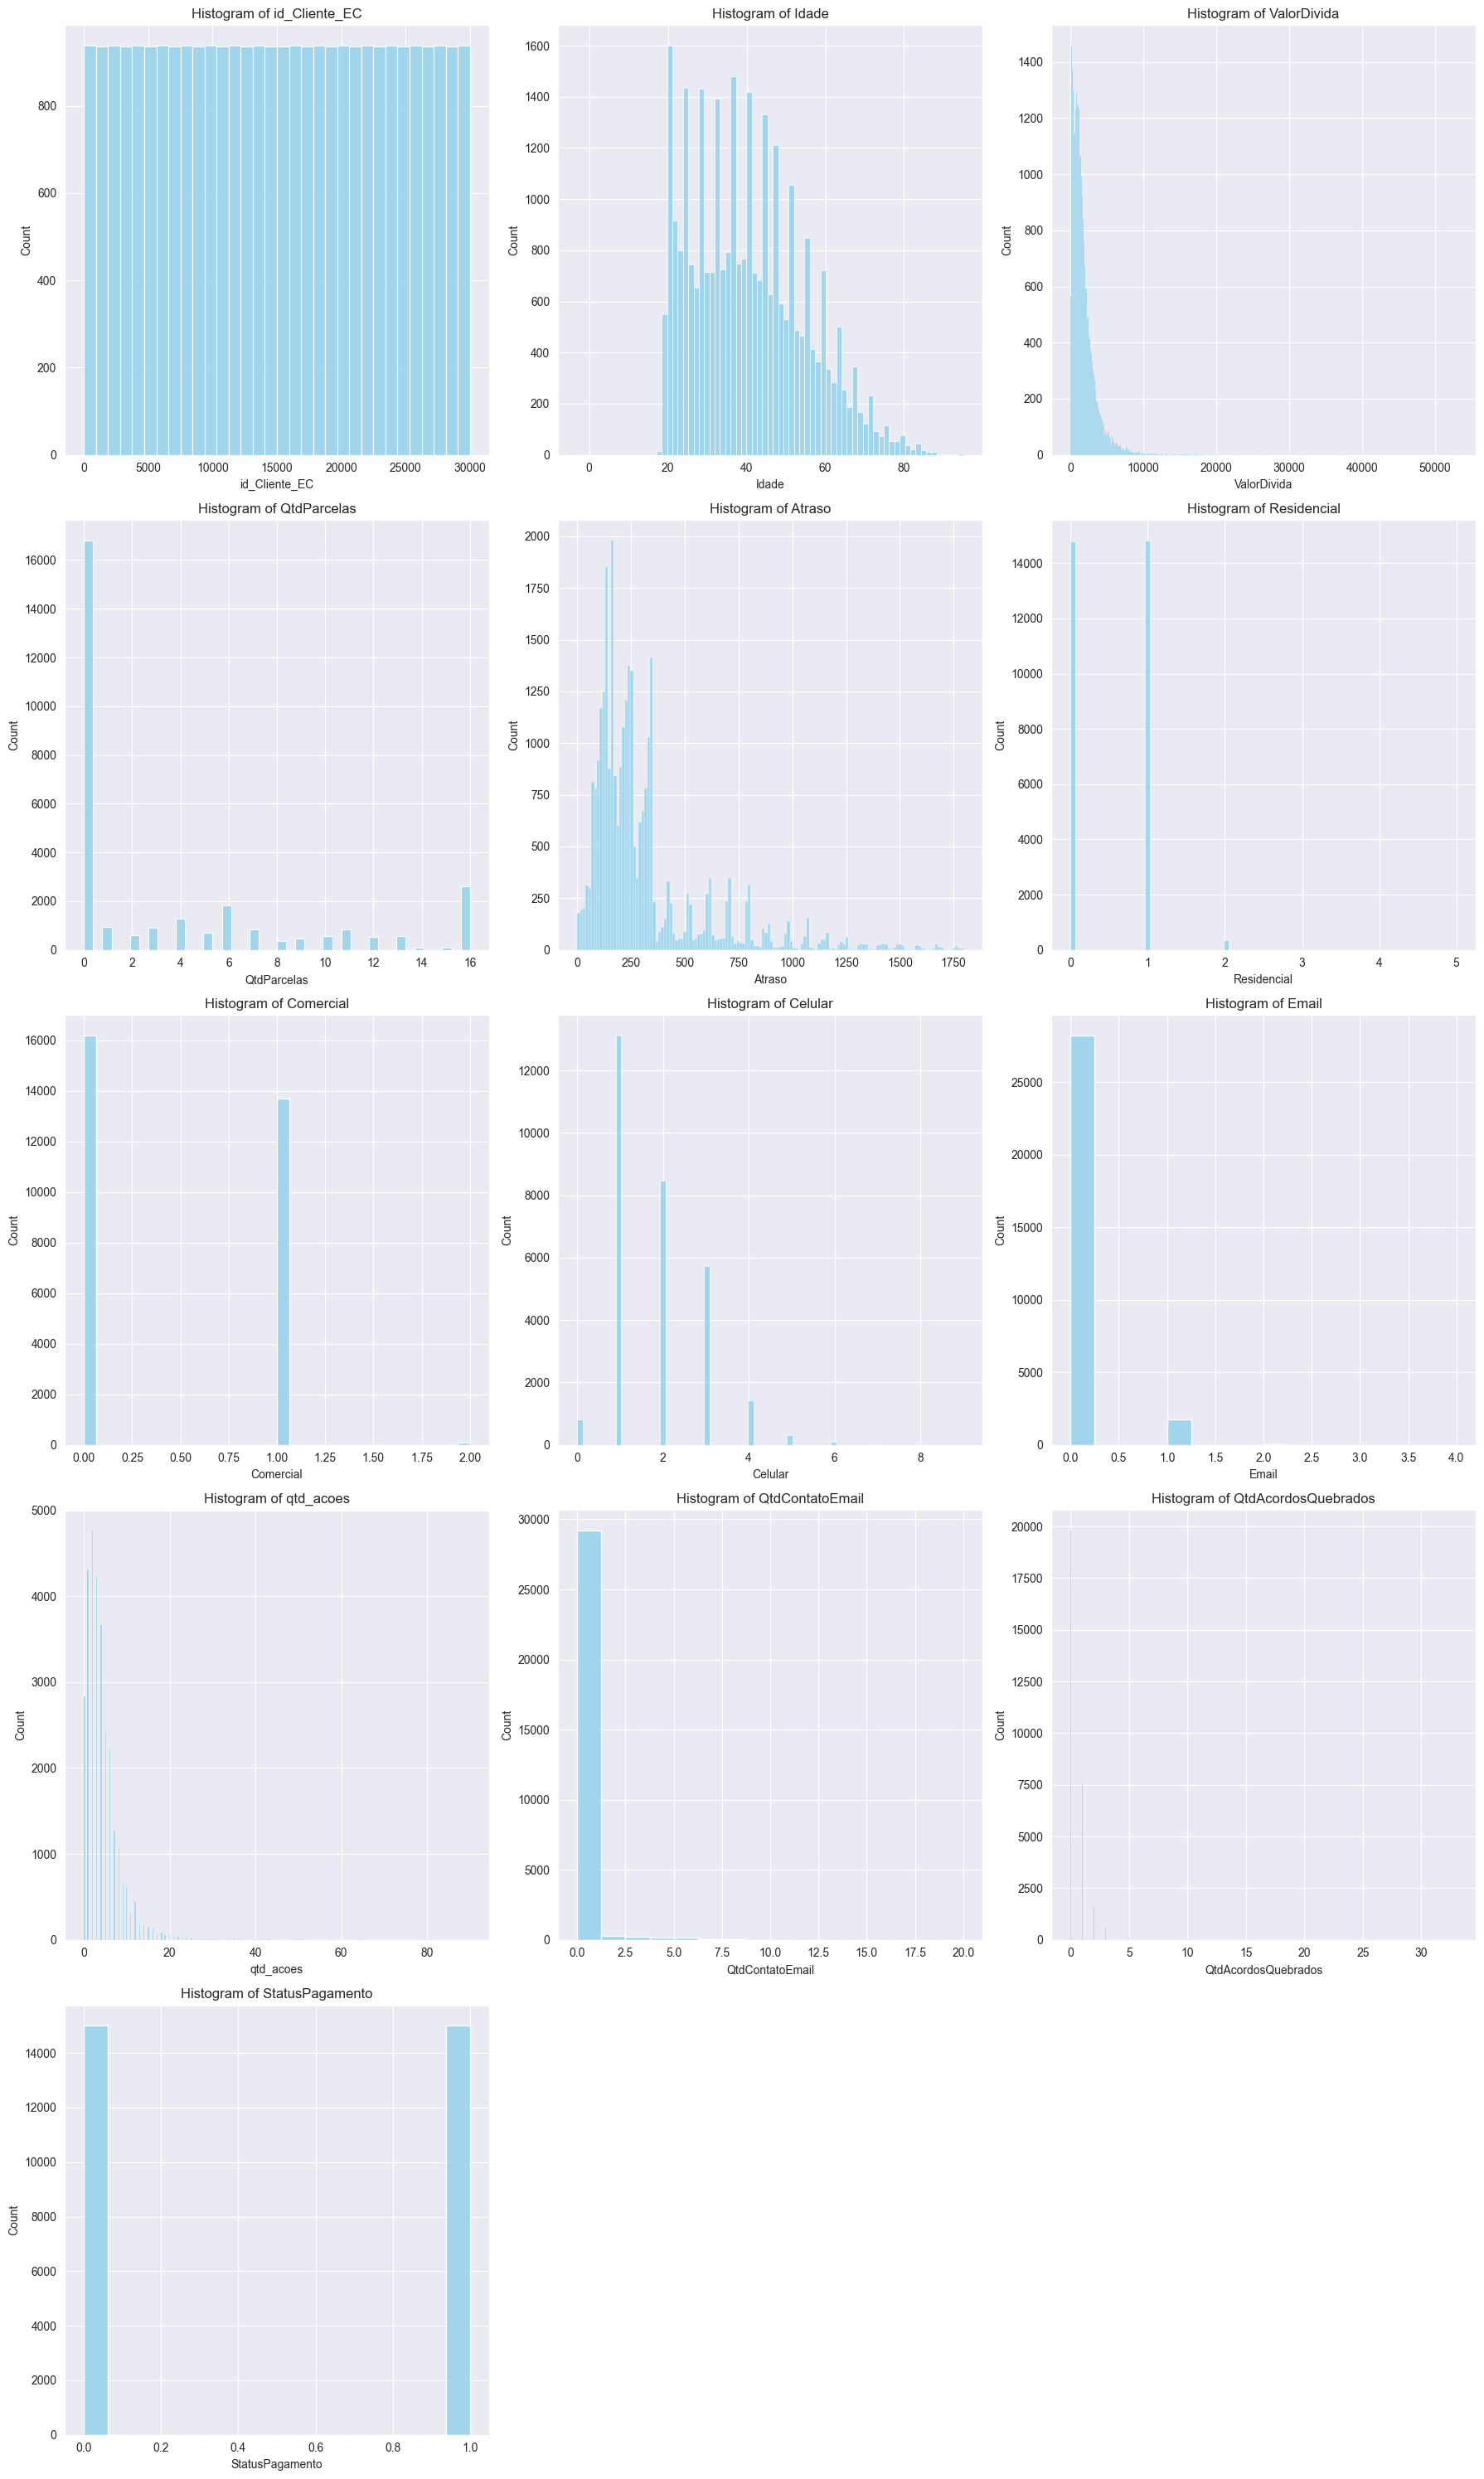

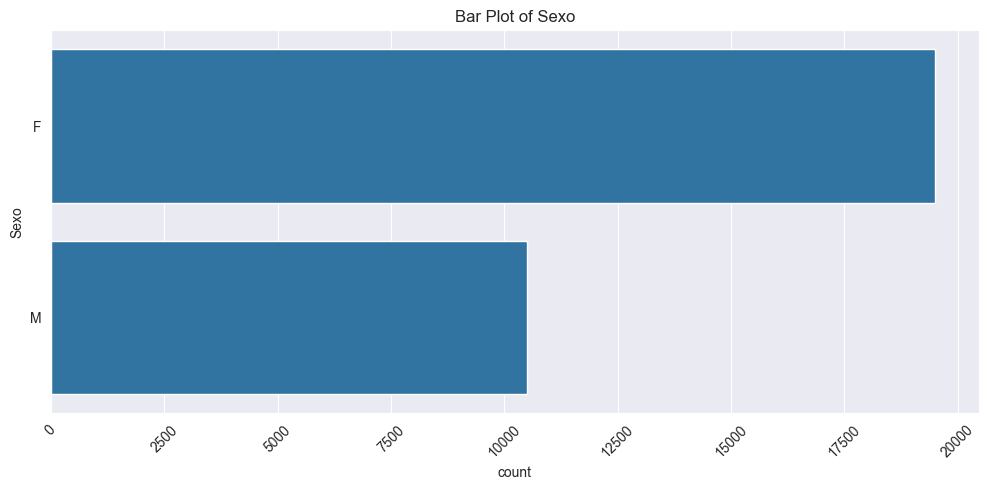

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(data):
    # Determine the number of rows needed for subplots based on the number of columns
    num_cols = data.select_dtypes(include=['int64', 'float64']).columns
    num_plots = len(num_cols)
    rows = (num_plots // 3) + (num_plots % 3 > 0)

    # Create a figure with subplots
    plt.figure(figsize=(18, 6 * rows))
    for i, col in enumerate(num_cols, 1):
        plt.subplot(rows, 3, i)
        sns.histplot(data[col], kde=False, color='skyblue')
        plt.title(f'Histogram of {col}')
        plt.tight_layout()

    # Show plots for categorical data separately
    cat_cols = data.select_dtypes(include=['object', 'category']).columns
    for col in cat_cols:
        plt.figure(figsize=(10, 5))
        sns.countplot(data[col])
        plt.title(f'Bar Plot of {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()

    plt.show()

# Test the function with the loaded dataset
plot_histograms(base_analise)

In [37]:
# Limpeza de dados para a base de análise

# 1. Corrigindo valores inválidos para a idade
base_analise['Idade'] = base_analise['Idade'].apply(lambda x: x if x > 0 else None)

# 2. Imputação de valores ausentes
# Usaremos a mediana para os campos numéricos faltantes
median_values = base_analise[['Residencial', 'Comercial', 'Celular', 'Idade']].median()
base_analise.fillna(median_values, inplace=True)

# Verificando novamente valores ausentes após a limpeza
cleaned_missing_values = base_analise.isnull().sum()
cleaned_missing_values, base_analise.describe()

(id_Cliente_EC          0
 Idade                  0
 Sexo                   0
 ValorDivida            0
 QtdParcelas            0
 Atraso                 0
 Residencial            0
 Comercial              0
 Celular                0
 Email                  0
 qtd_acoes              0
 QtdContatoEmail        0
 QtdAcordosQuebrados    0
 StatusPagamento        0
 dtype: int64,
        id_Cliente_EC         Idade   ValorDivida   QtdParcelas        Atraso  \
 count   30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
 mean    15000.500000     40.473667   1761.803388      3.667100    312.950467   
 std      8660.398374     14.377710   1769.267290      5.304773    279.087597   
 min         1.000000     17.000000      0.000000      0.000000      1.000000   
 25%      7500.750000     29.000000    663.922500      0.000000    141.000000   
 50%     15000.500000     39.000000   1297.130000      0.000000    229.000000   
 75%     22500.250000     50.000000   2281.035000     

Idade: Valores negativos foram substituídos pela mediana das idades positivas.
Telefones (Residencial, Comercial, Celular): Valores ausentes foram imputados usando a mediana para cada coluna respectiva.



Agora que a base de dados está preparada, vou proceder com a engenharia de recursos. Vou criar algumas variáveis adicionais que podem ser úteis para os modelos de predição, como a soma total de telefones e uma variável que indica a intensidade de contato com o cliente.

Após essa etapa, começaremos a construção e avaliação de modelos preditivos. Vamos explorar diferentes algoritmos e selecionar o melhor baseado em sua performance. ​

In [38]:
# Engenharia de recursos

# Criando novas variáveis
base_analise['TotalTelefones'] = base_analise['Residencial'] + base_analise['Comercial'] + base_analise['Celular']
base_analise['IntensidadeContato'] = base_analise['qtd_acoes'] + base_analise['QtdContatoEmail']

# Proporção Dívida/Parcela
base_analise['DividaPorParcela'] = base_analise.apply(
    lambda row: row['ValorDivida'] / row['QtdParcelas'] 
    if row['QtdParcelas'] > 0 else row['ValorDivida']
    , axis=1)

# Indicador de Contato (binário para indicar se o cliente possui contato registrado)
base_analise['ContatoRegistrado'] = ((base_analise['Residencial'] > 0) | 
                                     (base_analise['Comercial'] > 0) | 
                                     (base_analise['Celular'] > 0) | 
                                     (base_analise['Email'] > 0)).astype(int)

# Score de Atraso (categorias de atraso)
bins = [0, 30, 60, 90, 120, float('inf')]
labels = ['0-30', '31-60', '61-90', '91-120', '120+']
base_analise['AtrasoCategoria'] = pd.cut(base_analise['Atraso'], bins=bins, labels=labels)

# Intensidade de Contato Anterior
base_analise['IntensidadeContato'] = base_analise['qtd_acoes'] / (base_analise['QtdContatoEmail'] + 1)

# Taxa de Quebra de Acordo
base_analise['TaxaQuebraAcordo'] = base_analise['QtdAcordosQuebrados'] / (base_analise['qtd_acoes'] + 1)

# Variável de Engajamento
base_analise['Engajamento'] = (base_analise['Residencial'] + base_analise['Comercial'] + 
                               base_analise['Celular'] + base_analise['Email'] + base_analise['qtd_acoes'])

# Idade Categorizada
bins = [0, 25, 50, 65, float('inf')]
labels = ['Jovem', 'Adulto', 'Meia-idade', 'Idoso']
base_analise['IdadeCategoria'] = pd.cut(base_analise['Idade'], bins=bins, labels=labels)

# Sexo binarizado
base_analise = pd.get_dummies(base_analise, columns=['Sexo'], drop_first=False)

# Visualizar as primeiras linhas com as novas variáveis
base_analise.head()

,id_Cliente_EC,Idade,ValorDivida,QtdParcelas,Atraso,Residencial,Comercial,Celular,Email,qtd_acoes,...,TotalTelefones,IntensidadeContato,DividaPorParcela,ContatoRegistrado,AtrasoCategoria,TaxaQuebraAcordo,Engajamento,IdadeCategoria,Sexo_F,Sexo_M
0,1,33.0,340.70,0,328,1.0,1.0,2.0,0,4,...,4.0,4.0,340.70,1,120+,0.0,8.0,Adulto,True,False
1,2,30.0,1112.52,0,343,0.0,0.0,3.0,0,5,...,3.0,5.0,1112.52,1,120+,0.0,8.0,Adulto,False,True
2,3,77.0,1574.40,0,318,1.0,0.0,3.0,0,6,...,4.0,6.0,1574.40,1,120+,0.0,10.0,Idoso,True,False
3,4,25.0,903.68,0,795,0.0,1.0,3.0,0,4,...,4.0,4.0,903.68,1,120+,0.0,8.0,Jovem,True,False
4,5,38.0,1925.43,0,216,1.0,1.0,2.0,0,2,...,4.0,2.0,1925.43,1,120+,0.0,6.0,Adulto,False,True


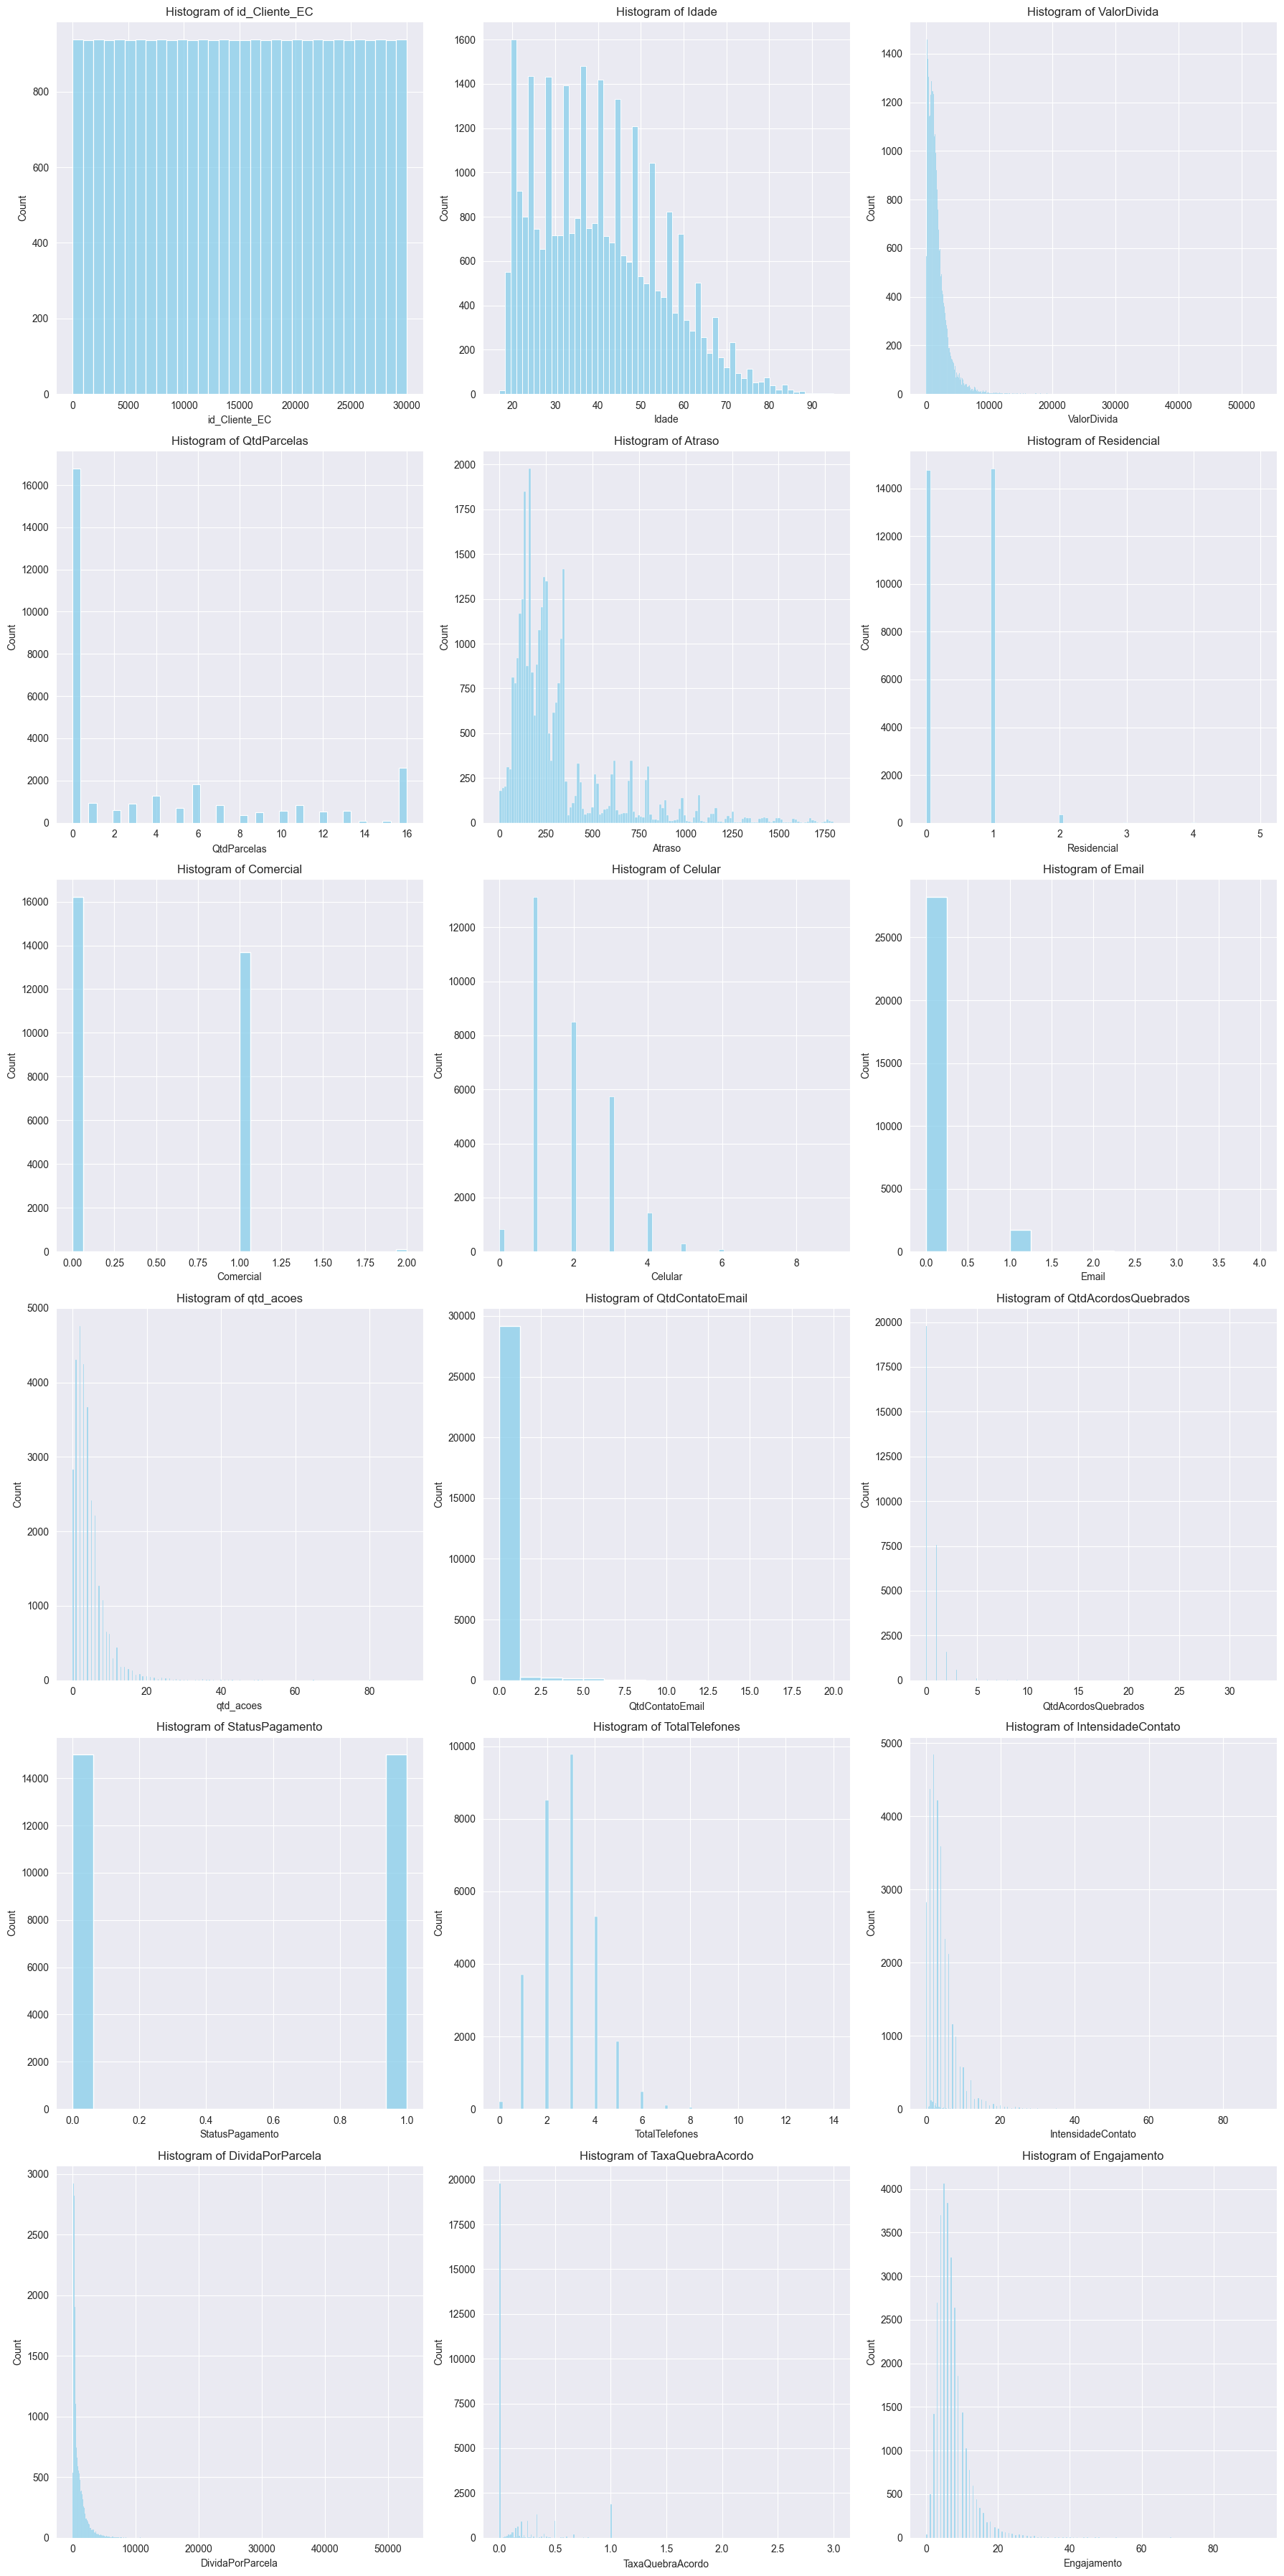

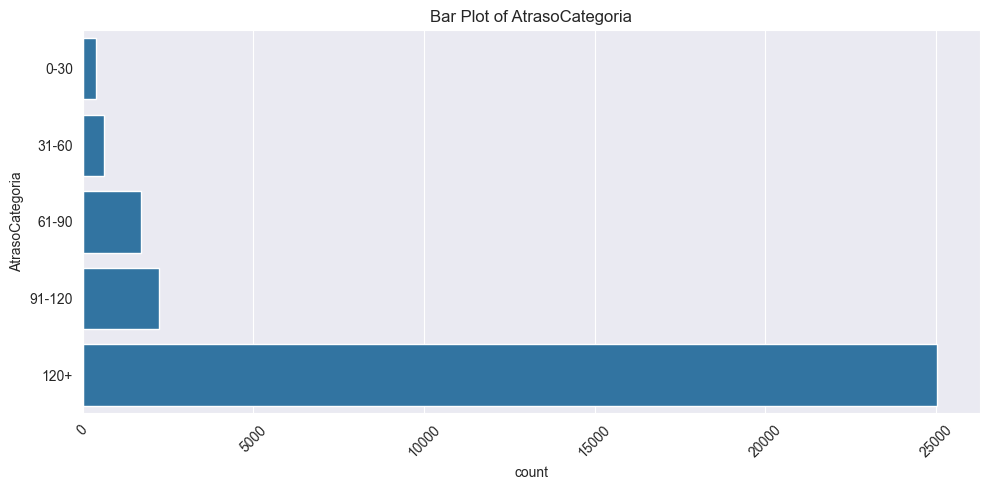

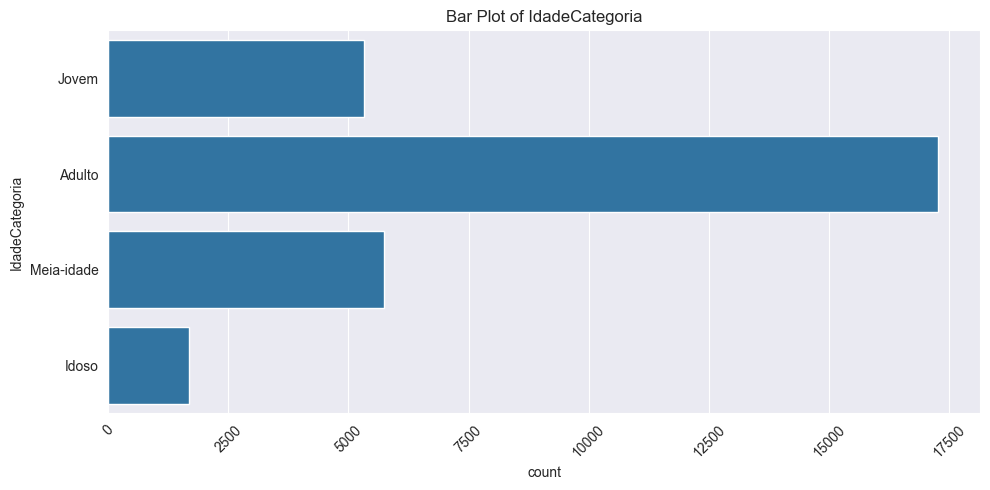

In [39]:
plot_histograms(base_analise)

In [49]:
# Salvando a base de dados preparada
base_analise.to_csv('base_analise_preparada.csv', index=False)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Identificar colunas categóricas e numéricas
categorical_cols = base_analise.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = base_analise.select_dtypes(include=['int64', 'float64']).drop(columns=['StatusPagamento', 'id_Cliente_EC']).columns.tolist()

# Pipeline para tratamento das colunas numéricas: imputação de valores faltantes e normalização
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Pipeline para tratamento das colunas categóricas: imputação de valores faltantes e codificação one-hot
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combinar os tratamentos em um único ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Separar features e target
X = base_analise.drop(['id_Cliente_EC', 'StatusPagamento'], axis=1)
y = base_analise['StatusPagamento']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# Aplicar o preprocessamento
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

# Verificar as dimensões das matrizes processadas
print(X_train_prepared.shape, X_test_prepared.shape)

X_train_prepared

(24000, 25) (6000, 25)


array([[ 1.21743479,  0.90597936,  2.3188372 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.45058162, -0.25586268, -0.69125517, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.1479341 , -0.82469848, -0.69125517, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.35409051,  1.40701068,  1.37818334, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.38342658, -0.90321722, -0.69125517, ...,  0.        ,
         0.        ,  0.        ],
       [-1.35409051, -0.19262993, -0.69125517, ...,  0.        ,
         1.        ,  0.        ]])

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Inicializar o modelo de Regressão Logística
logistic_model = LogisticRegression(max_iter=1000, random_state=297844)

# Treinar o modelo
logistic_model.fit(X_train_prepared, y_train)

# Prever o conjunto de teste
logistic_pred = logistic_model.predict(X_test_prepared)

# Calcular a acurácia
logistic_accuracy = accuracy_score(y_test, logistic_pred)
logistic_accuracy

0.893

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar o modelo de Floresta Aleatória
forest_model = RandomForestClassifier(random_state=297844)

# Treinar o modelo
forest_model.fit(X_train_prepared, y_train)

# Prever o conjunto de teste
forest_pred = forest_model.predict(X_test_prepared)

# Calcular a acurácia
forest_accuracy = accuracy_score(y_test, forest_pred)
forest_accuracy

0.914

In [45]:
from sklearn.neural_network import MLPClassifier

# Inicializar o modelo de Rede Neural
neural_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=297844)

# Treinar o modelo
neural_model.fit(X_train_prepared, y_train)

# Prever o conjunto de teste
neural_pred = neural_model.predict(X_test_prepared)

# Calcular a acurácia
neural_accuracy = accuracy_score(y_test, neural_pred)
neural_accuracy

0.9083333333333333

In [47]:
from sklearn.model_selection import cross_validate

# Configurar os modelos para validação cruzada
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=297844),
    "Random Forest": RandomForestClassifier(random_state=297844),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=297844)
}

# Preparar a pipeline de pré-processamento
preprocessor_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Dicionário para armazenar os resultados
cross_val_results = {}

# Realizar a validação cruzada para cada modelo
for name, model in models.items():
    # Criar a pipeline completa para o modelo
    full_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Aplicar validação cruzada
    scores = cross_validate(full_pipeline, X, y, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], 
                            return_train_score=False)
    
    # Armazenar médias das métricas
    cross_val_results[name] = {
        'Accuracy': scores['test_accuracy'].mean(),
        'Precision': scores['test_precision'].mean(),
        'Recall': scores['test_recall'].mean(),
        'F1-Score': scores['test_f1'].mean(),
        'AUC': scores['test_roc_auc'].mean()
    }

cross_val_results

{'Logistic Regression': {'Accuracy': 0.8924666666666667,
  'Precision': 0.9293074885591317,
  'Recall': 0.8495999999999999,
  'F1-Score': 0.8876513350972021,
  'AUC': 0.9426296888888889},
 'Random Forest': {'Accuracy': 0.9136333333333333,
  'Precision': 0.9307285637131688,
  'Recall': 0.8938666666666666,
  'F1-Score': 0.9118846187902812,
  'AUC': 0.9612238333333332},
 'Neural Network': {'Accuracy': 0.9075000000000001,
  'Precision': 0.9262697032456305,
  'Recall': 0.8856666666666667,
  'F1-Score': 0.9054471891199591,
  'AUC': 0.9543541555555557}}

In [48]:
pd.DataFrame(cross_val_results)

,Logistic Regression,Random Forest,Neural Network
Accuracy,0.892467,0.913633,0.907500
Precision,0.929307,0.930729,0.926270
Recall,0.849600,0.893867,0.885667
F1-Score,0.887651,0.911885,0.905447
AUC,0.942630,0.961224,0.954354


# Conclusões

### Engenharia de Recursos
- **TotalTelefones**: A soma de telefones residenciais, comerciais e celulares fornece uma visão do grau de acessibilidade do cliente. Esta variável pode ajudar a identificar clientes que são mais fáceis de contatar, o que potencialmente influencia a eficácia das ações de cobrança.
- **IntensidadeContato**: A combinação das ações de cobrança e contatos por e-mail reflete o esforço feito para contatar o cliente antes do status atual da dívida. Uma maior intensidade pode indicar tentativas anteriores de resolução da dívida, o que poderia influenciar o status de pagamento atual.
- **DividaPorParcela**: Essa proporção oferece insights sobre o tamanho dos compromissos financeiros do cliente em relação ao seu saldo devedor, o que pode ser um indicativo do seu potencial de pagamento.
- **ContatoRegistrado**: Uma variável binária que indica se o cliente possui alguma forma de contato registrada. Esta variável é útil para filtrar rapidamente os clientes que podem ser contactados.
- **AtrasoCategoria**: Classificar os atrasos em categorias permite modelar a probabilidade de inadimplência com base na gravidade do atraso, uma variável crítica para agências de cobrança.
- **TaxaQuebraAcordo**: Esta taxa pode ser uma métrica de confiabilidade do devedor e sua disposição para cumprir acordos.
- **Engajamento**: Uma soma que considera vários tipos de interações com o cliente, útil para avaliar o nível de engajamento ou responsividade do cliente.
- **Idade Categorizada**: Grupos etários podem apresentar diferentes comportamentos de pagamento, portanto, essa segmentação pode ajudar a adaptar estratégias de cobrança.
- **Sexo Binarizado**: Permite a inclusão do gênero como uma variável numérica nos modelos, facilitando a análise de diferenças comportamentais de pagamento entre os sexos.
### Resultados dos Modelos
Comparando os três modelos, percebemos o seguinte:

- **Floresta Aleatória** teve o desempenho mais forte em todas as métricas (AUC: 0.961, F1-Score: 0.912).
- **Rede Neural e Regressão Logística** também apresentaram bons resultados, mas ligeiramente inferiores à Floresta Aleatória.  